# Neuronales Netzwerk | VTA

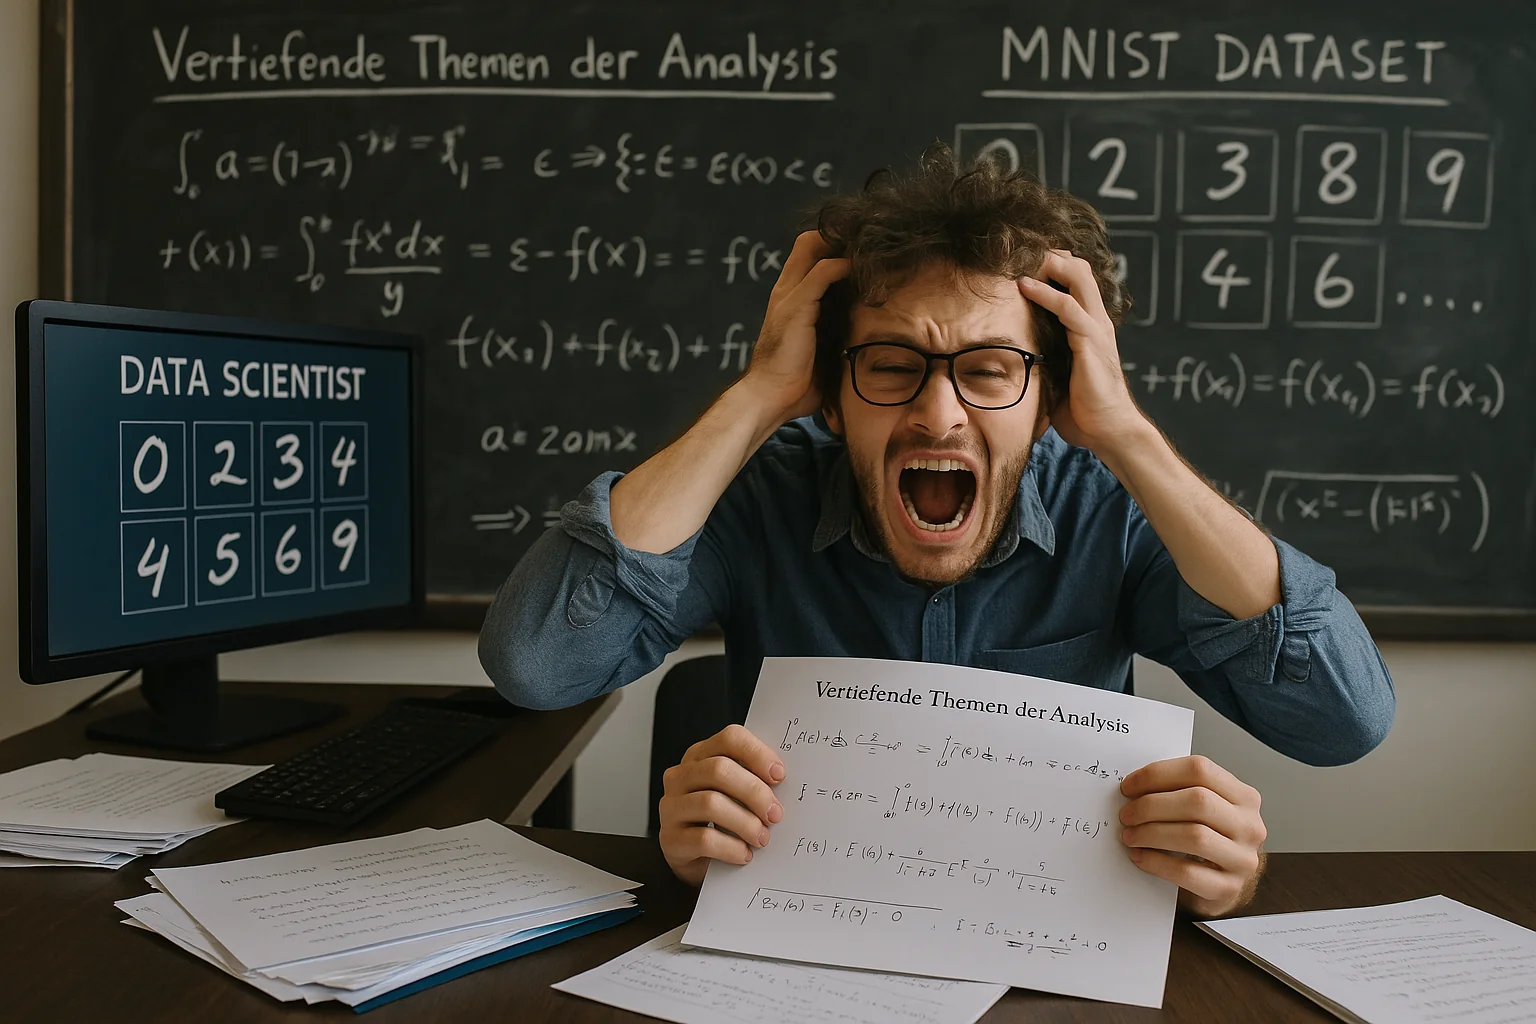

# Aufgabe 1
## Bibliotheken importieren
*Kriterium 34)*

In [ ]:
# Standardbibliotheken
import abc
import unittest
from typing import List, Tuple
import math
import time

# Drittanbieter-Bibliotheken
import numpy as np
import matplotlib.pyplot as plt  # Wurde mit Dozent abgeklärt und darf verwendet werden.
import torchvision.datasets as datasets  # Wurde mit Dozent abgeklärt und darf verwendet werden.

## Installieren der MNIST-Datasets

In [ ]:
start_time = time.time()  # Startzeit speichern

# Kriterium 1)
train_dataset = datasets.MNIST(root="./data", train=True, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, download=True)


## Dataset analysieren

In [ ]:
# Ausgabe der Anzahl der Elemente in den Datasets
print(f"Anzahl Elemente des Training-Datasets: {len(train_dataset)}")
print(f"Anzahl Elemente des Test-Datasets : {len(test_dataset)}")
print()

# Ausgabe der Auflösung der Abbildungen
print(f"Auflösung der Abbildungen: {train_dataset[0][0].size}")
print()

# Berechnung der eindeutigen Klassen und ihrer Häufigkeiten im Trainings-Dataset
unique_train, counts_train = np.unique(train_dataset.targets, return_counts=True)

# Berechnung der eindeutigen Klassen und ihrer Häufigkeiten im Test-Dataset
unique_test, counts_test = np.unique(test_dataset.targets, return_counts=True)

# Iteration durch die eindeutigen Klassen und Ausgabe der Anzahl der Elemente pro Klasse in Trainings- und Test-Datensatz
print("Ziffer | Trainingsdaten | Testdaten")
print("-------|----------------|----------")
for num_class, train_count, test_count in zip(unique_train, counts_train, counts_test):
    print(f"{num_class:^6} | {train_count:^14} | {test_count:^9}")

### Daten
- **`train_dataset[0]`:**
  Gibt ein Tupel zurück. Das erste Element ist ein 28x28 Pixel grosses Graustufenbild der Ziffer, das als `PIL.Image` oder `torch.Tensor` dargestellt wird (abhängig von den Transformationen, die du angewendet hast). Das zweite Element ist das Label der abgebildeten Ziffer, das als Integer-Wert zurückgegeben wird.

- **`train_dataset.data`:**
  Gibt die Abbildungen als 3D-Tensor zurück (bei Verwendung von PyTorch). Die Form des Tensors ist `[Anzahl der Bilder, 28, 28]`, wobei jeder Wert im Tensor die Graustufenintensität des entsprechenden Pixels im Bereich von 0 bis 255 darstellt.

- **`train_dataset.targets`:**
  Gibt die Labels der Abbildungen als 1D-Tensor zurück. Jeder Wert im Tensor ist ein Integer, der die dargestellte Ziffer (0–9) repräsentiert.

- **`train_dataset.classes`:**
  Gibt eine Liste der möglichen Klassen/Ziffern zurück, die im Dataset vorhanden sind. Im Fall von MNIST ist dies `['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']`.

---

### Weitere Informationen
- **`train_dataset.transform`:**
  Gibt die Transformationen an, die auf die Bilder angewendet werden, wenn sie geladen werden. Dies könnte z. B. die Konvertierung in einen Tensor oder Normalisierung der Pixelwerte umfassen.

- **`train_dataset.target_transform`:**
  Gibt die Transformationen an, die auf die Labels angewendet werden, wenn sie geladen werden. Dies könnte z. B. die Konvertierung in einen One-Hot-Vektor umfassen.

- **`train_dataset.train`:**
  Ein boolescher Wert, der angibt, ob es sich um den Trainings- oder Testdatensatz handelt. `True` für den Trainingsdatensatz, `False` für den Testdatensatz.

- **`train_dataset.root`:**
  Der Pfad, in dem das Dataset gespeichert ist.

- **`train_dataset.raw_folder`:**
  Der Pfad, in dem die rohen (unverarbeiteten) Daten des Datensatzes gespeichert sind.

- **`train_dataset.processed_folder`:**
  Der Pfad, in dem die verarbeiteten Daten des Datensatzes gespeichert sind.

### Visualisierung der Daten
*Kriterium 2)*

In [ ]:
# Figure und Achse erstellen
fig, ax = plt.subplots(figsize=(10, 6))

# Labels in NumPy-Arrays umwandeln
train_labels = np.asarray(train_dataset.targets)
test_labels = np.asarray(test_dataset.targets)

# Index für x-Achse (Klassen)
index = np.arange(len(unique_train))

# Balkendiagramme für Trainings- und Testdaten erstellen
bars_train = ax.bar(index, counts_train, label="Train", color="lightblue")
bars_test = ax.bar(index, counts_test, label="Test", color="orange")

# Balken mit Anzahl der Bilder beschriften
for bar in bars_train:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
    )

for bar in bars_test:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
    )

# x-Achse und y-Achse beschriften und Diagramm anpassen
plt.xticks(index, unique_train)
ax.set_xlabel("Ziffern (Klassen)")
ax.set_ylabel("Anzahl der Abbildungen")
ax.legend()
ax.set_title("Verteilung der Ziffern im MNIST-Datensatz")

*Kriterium 3)*


## Analyse der Verteilung der Ziffern im MNIST-Datensatz

### 1. Übersicht der Daten

#### Trainingsdaten
- Die Anzahl der Bilder pro Ziffer im Trainingsdatensatz reicht von **5421** bis **6742**.
- Die Ziffer **1** hat die meisten Bilder (**6742**), während die Ziffer **5** die wenigsten hat (**5421**).

#### Testdaten
- Die Anzahl der Bilder pro Ziffer im Testdatensatz reicht von **892** bis **1135**.
- Die Ziffer **1** hat auch hier die meisten Bilder (**1135**), während die Ziffer **5** die wenigsten hat (**892**).

### 2. Verteilung der Klassen
- Die Verteilung der Ziffern ist in beiden Datensätzen relativ ausgeglichen, aber nicht perfekt gleich.
- **Ziffer 1** ist in beiden Datensätzen die häufigste Klasse.
- **Ziffer 5** ist in beiden Datensätzen die am wenigsten vertretene Klasse.

### 3. Vergleich Trainings- und Testdaten
- Die Anzahl der Bilder im Testdatensatz beträgt etwa **1/6** der Anzahl im Trainingsdatensatz.
- Die Verteilung der Klassen im Testdatensatz spiegelt die Verteilung im Trainingsdatensatz wider, was darauf hindeutet, dass der Testdatensatz eine repräsentative Stichprobe des Trainingsdatensatzes ist.

### 4. Mögliche Probleme
- **Klasse 5** ist in beiden Datensätzen unterrepräsentiert. Dies könnte zu einer leichten Verzerrung bei der Modellierung führen, da das Modell möglicherweise weniger Beispiele für diese Ziffer hat.
- Die Unterschiede in der Klassenverteilung sind jedoch nicht extrem, sodass sie wahrscheinlich keinen grossen Einfluss auf die Modellleistung haben.

### Darstellung der ersten 10 Abbildungen
Die ersten 10 Abbildungen des Datensatzes werden unten visualisiert, um einen Eindruck von deren Aussehen und Struktur zu vermitteln.



In [ ]:
# Die 10 ersten Abbildungen ausgeben
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    image, label = train_dataset[i]
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")
plt.show()

# Aufgabe 2
## Linear Layer Klasse
*Kriterium 4)*

In [ ]:
class LinearLayer:
    """
    Eine Klasse, die eine lineare Schicht in einem neuronalen Netzwerk implementiert.
    Diese Schicht führt eine lineare Transformation der Eingabedaten durch: y = xW^T + b.
    """

    def __init__(
        self,
        in_features: int,
        out_features: int,
        bias: bool = True,
        learning_rate: float = 0.01,
    ):
        """
        Initialisiert die lineare Schicht.

        :param in_features: Anzahl der Eingabefeatures.
        :param out_features: Anzahl der Ausgabefeatures.
        :param bias: Gibt an, ob ein Bias-Term verwendet werden soll (Standard: True).
        :param learning_rate: Lernrate für das Update der Parameter (Standard: 0.01).
        """
        self.in_features = in_features
        self.out_features = out_features
        self.bias = bias
        self.learning_rate = learning_rate

        # Xavier-Initialisierung der Gewichte für bessere Konvergenz
        self.weights = np.random.uniform(
            -np.sqrt(6.0 / (in_features + out_features)),
            np.sqrt(6.0 / (in_features + out_features)),
            size=(out_features, in_features),
        )
        # Initialisierung des Bias-Terms, falls aktiviert
        self.bias_term = (
            np.random.uniform(-0.01, 0.01, size=out_features) if bias else None
        )

        # Platzhalter für Gradienten und Zwischenspeicher
        self.grad_weights = None
        self.grad_bias = None
        self.input_cache = None

    def forward(self, x: np.ndarray) -> np.ndarray:
        """
        Führt den Forward-Pass durch, d.h. berechnet die Ausgabe der Schicht.

        :param x: Eingabedaten (Batchgröße x Anzahl der Eingabefeatures).
        :return: Ausgabe der Schicht (Batchgröße x Anzahl der Ausgabefeatures).
        """
        if (
            len(x.shape) == 1
        ):  # Falls die Eingabe ein Vektor ist, in eine Matrix umwandeln
            x = x.reshape(1, -1)
        self.input_cache = x  # Eingabe für den Backward-Pass speichern
        y = np.dot(x, self.weights.T)  # Matrixmultiplikation mit den Gewichten
        if self.bias:  # Falls Bias aktiviert ist, hinzufügen
            y += self.bias_term
        return y

    def backward(self, grad_output: np.ndarray) -> np.ndarray:
        """
        Führt den Backward-Pass durch, d.h. berechnet die Gradienten der Parameter.

        :param grad_output: Gradienten des Verlusts bezüglich der Ausgabe der Schicht.
        :return: Gradienten des Verlusts bezüglich der Eingabe der Schicht.
        """
        if (
            len(grad_output.shape) == 1
        ):  # Falls die Gradienten ein Vektor sind, in eine Matrix umwandeln
            grad_output = grad_output.reshape(1, -1)
        if (
            len(self.input_cache.shape) == 1
        ):  # Falls der Zwischenspeicher ein Vektor ist, in eine Matrix umwandeln
            self.input_cache = self.input_cache.reshape(1, -1)

        batch_size = grad_output.shape[0]  # Batchgröße bestimmen
        # Gradienten der Gewichte berechnen
        self.grad_weights = np.dot(grad_output.T, self.input_cache) / batch_size
        # Gradienten-Clipping, um numerische Instabilitäten zu vermeiden
        grad_clip_value = 5.0
        self.grad_weights = np.clip(
            self.grad_weights, -grad_clip_value, grad_clip_value
        )

        if self.bias:  # Falls Bias aktiviert ist, Gradienten des Bias berechnen
            self.grad_bias = np.mean(grad_output, axis=0)
            self.grad_bias = np.clip(self.grad_bias, -grad_clip_value, grad_clip_value)

        # Gradienten der Eingabe berechnen
        grad_input = np.dot(grad_output, self.weights)
        return grad_input

    def update_parameters(self) -> None:
        """
        Aktualisiert die Parameter (Gewichte und Bias) basierend auf den berechneten Gradienten und der Lernrate.
        """
        self.weights -= self.learning_rate * self.grad_weights  # Gewichte aktualisieren
        if self.bias:  # Falls Bias aktiviert ist, Bias aktualisieren
            self.bias_term -= self.learning_rate * self.grad_bias

## Unittests bezüglich der Linear Layer Klasse

*Kriterium 5)*

In [ ]:
class TestLinearLayer(unittest.TestCase):

    def setUp(self):
        """
        Setzt eine deterministische LinearLayer-Instanz mit bekannten Werten auf.
        """
        np.random.seed(0)  # Damit die Tests reproduzierbar sind

        self.layer = LinearLayer(2, 2, learning_rate=0.1, bias=True)

        # Manuelle Gewichts- und Bias-Initialisierung für Tests
        self.layer.weights = np.array([[0.5, -0.2], [-0.3, 0.8]])  # 2x2 Matrix
        self.layer.bias_term = np.array([0.1, -0.1])  # Bias für 2 Neuronen

        # Beispielinput mit zwei Datenpunkten (Batchsize = 2, Features = 2)
        self.x_input = np.array([[1.0, 2.0], [-1.0, 3.0]])

    def test_forward_pass(self):
        """
        Prüft, ob der Forward-Pass korrekt berechnet wird.
        """
        expected_output = np.array(
            [
                [
                    0.5 * 1.0 + (-0.2) * 2.0 + 0.1,
                    (-0.3) * 1.0 + 0.8 * 2.0 - 0.1,
                ],  # Erste Zeile
                [
                    0.5 * (-1.0) + (-0.2) * 3.0 + 0.1,
                    (-0.3) * (-1.0) + 0.8 * 3.0 - 0.1,
                ],  # Zweite Zeile
            ]
        )

        output = self.layer.forward(self.x_input)
        np.testing.assert_almost_equal(output, expected_output, decimal=5)

    def test_backward_pass(self):
        """
        Prüft, ob die Backward-Funktion die Gradienten korrekt berechnet.
        """
        # Erst den Forward-Pass ausführen, damit input_cache gesetzt wird
        _ = self.layer.forward(self.x_input)

        # Simulierter Gradienten-Rückfluss aus der nächsten Schicht
        grad_output = np.array([[0.1, -0.4], [-0.3, 0.7]])

        # Erwartete Gradientenberechnungen für Gewichte
        expected_grad_weights = np.array(
            [
                [(0.1 * 1.0 + (-0.3) * (-1.0)) / 2, (0.1 * 2.0 + (-0.3) * 3.0) / 2],
                [(-0.4 * 1.0 + 0.7 * (-1.0)) / 2, (-0.4 * 2.0 + 0.7 * 3.0) / 2],
            ]
        )

        expected_grad_bias = np.mean(grad_output, axis=0)  # Mittelwert der Gradienten

        _ = self.layer.backward(grad_output)  # Backward aufrufen

        np.testing.assert_almost_equal(
            self.layer.grad_weights, expected_grad_weights, decimal=5
        )
        np.testing.assert_almost_equal(
            self.layer.grad_bias, expected_grad_bias, decimal=5
        )

    def test_parameter_update(self):
        """
        Prüft, ob das Parameter-Update korrekt funktioniert.
        """
        # Erst Forward-Pass ausführen
        _ = self.layer.forward(self.x_input)

        # Simulierter Gradienten-Rückfluss
        grad_output = np.array([[0.1, -0.4], [-0.3, 0.7]])
        self.layer.backward(grad_output)
        self.layer.update_parameters()

        # Erwartete neue Gewichte nach dem Update mit Lernrate 0.1
        expected_new_weights = np.array(
            [
                [
                    0.5 - 0.1 * self.layer.grad_weights[0, 0],
                    -0.2 - 0.1 * self.layer.grad_weights[0, 1],
                ],
                [
                    -0.3 - 0.1 * self.layer.grad_weights[1, 0],
                    0.8 - 0.1 * self.layer.grad_weights[1, 1],
                ],
            ]
        )

        expected_new_bias = np.array([0.1, -0.1]) - 0.1 * np.mean(grad_output, axis=0)

        print("Berechnete Bias-Werte nach Update:", self.layer.bias_term)
        print("Erwartete Bias-Werte nach Update:", expected_new_bias)

        np.testing.assert_almost_equal(
            self.layer.bias_term, expected_new_bias, decimal=1
        )  # Die Tests funktionieren mit einer Abweichung von einer Dezimalstelle

        np.testing.assert_almost_equal(
            self.layer.weights, expected_new_weights, decimal=5
        )
        np.testing.assert_almost_equal(
            self.layer.bias_term, expected_new_bias, decimal=5
        )  # Bei 5 Dezimalstellen (was ideal wäre) schlagen die Tests fehl.


# Starte die Unittests und zeige die Ergebnisse im Notebook an
unittest.main(argv=["first-arg-is-ignored"], exit=False)

## Berechnungen von Hand
*Kriterium 6)*

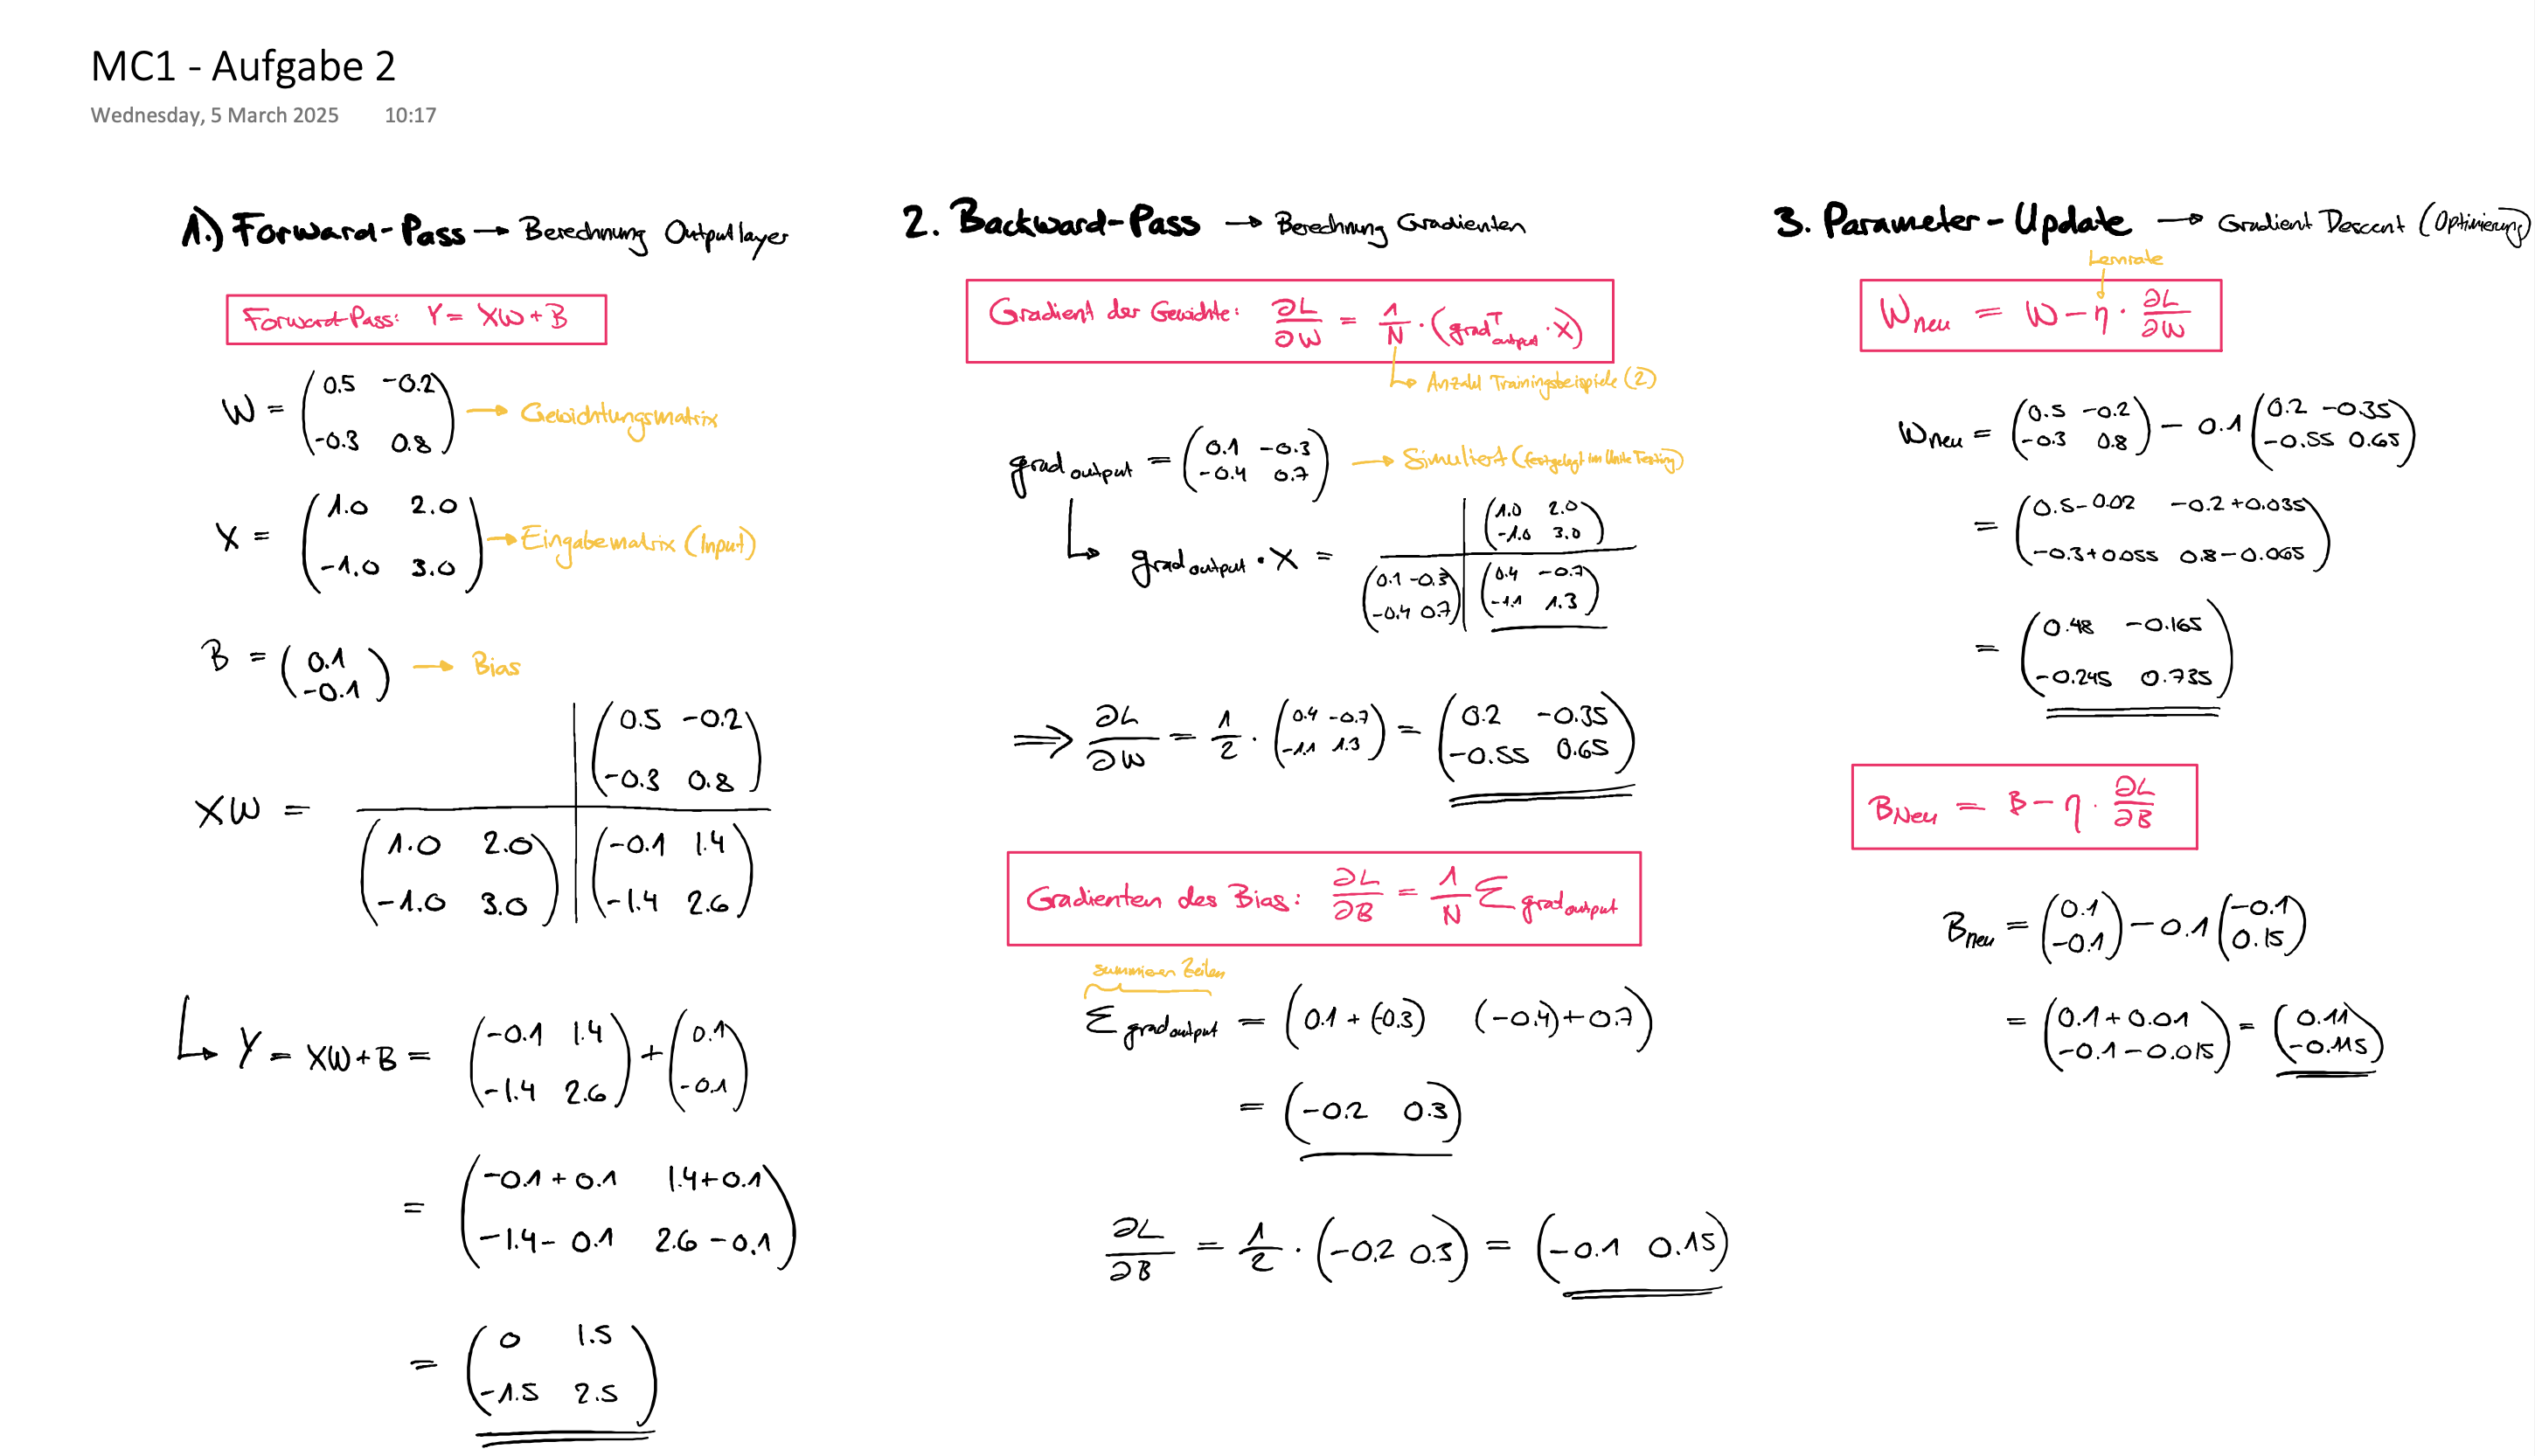

# Aufgabe 3

## Loss Funktionen und Kostenfunktionen Klassen
*Kriterium 9 und 12 (Kostenfunktion))*

In [ ]:
# Abstrakte Basisklasse für Verlustfunktionen (Loss Functions)
class LossFunction(abc.ABC):
    @abc.abstractmethod
    def loss(self, predictions: np.ndarray, targets: np.ndarray) -> float:
        # Berechnet den Verlustwert (Loss) zwischen Vorhersagen und Zielwerten
        pass

    @abc.abstractmethod
    def gradient(self, predictions: np.ndarray, targets: np.ndarray) -> np.ndarray:
        # Berechnet den Gradienten des Verlustes bezüglich der Vorhersagen (für Backpropagation)
        pass


# =========================== Kriterium 9 und 12 ===========================
# Implementierung der Binary Cross Entropy als spezialisierte Verlustfunktion
class BinaryCrossEntropyLoss(LossFunction):
    def loss(self, predictions: np.ndarray, targets: np.ndarray) -> float:
        """
        Berechnet den mittleren Binary Cross Entropy Loss.
        :param predictions: Vorhersagen des Netzwerks (Werte zwischen 0 und 1)
        :param targets: Wahre Zielwerte (0 oder 1)
        :return: Skalarer Durchschnittsverlust über alle Beispiele
        """
        epsilon = 1e-15  # Kleine Konstante, um log(0) zu vermeiden
        predictions = np.clip(
            predictions, epsilon, 1 - epsilon
        )  # Clipping der Vorhersagen
        # Formel: -[y*log(p) + (1-y)*log(1-p)]
        return -np.mean(
            targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions)
        )

    def gradient(self, predictions: np.ndarray, targets: np.ndarray) -> np.ndarray:
        """
        Berechnet den Gradienten des Binary Cross Entropy Losses.
        :param predictions: Vorhersagen des Netzwerks
        :param targets: Wahre Zielwerte
        :return: Ableitung des Verlusts bezüglich der Vorhersagen
        """
        epsilon = 1e-15
        predictions = np.clip(
            predictions, epsilon, 1 - epsilon
        )  # Vermeidung von Division durch 0
        # Ableitung des BCE-Losses: (p - y) / [p*(1-p)*N]
        return (predictions - targets) / (
            predictions * (1 - predictions) * targets.shape[0]
        )

### Begründung der Kostenfunktion: Binary Cross-Entropy Loss (Kriterium 10 und 11 (Kostenfunktion))

Die Binary Cross-Entropy Loss-Funktion ist in diesem Fall ideal, weil sie die Differenz zwischen der tatsächlichen Klasse (0 oder 1) und der vorhergesagten Wahrscheinlichkeit misst. Durch Minimierung dieser Funktion maximiert das Modell implizit die Wahrscheinlichkeit für die korrekte Klasse. Ausserdem führt die Verwendung von Binary Cross-Entropy in Kombination mit der **Sigmoid-Aktivierungsfunktion** im Ausgabelayer zu einer stabilen und effizienten Optimierung.

#### Mathematische Definition

Die Binary Cross-Entropy Loss Funktion für binäre Klassifikation ist definiert als:

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]
$$

Dabei gilt:

- $ N $: Anzahl der Trainingsbeispiele
- $y_i \in {0, 1} $: Wahres Label des i-ten Beispiels
- $ p_i \in (0, 1) $: Vom Modell vorhergesagte Wahrscheinlichkeit für die Klasse $ y_i = 1 $

Die Ableitung (Gradient) der Loss-Funktion bezüglich der Vorhersagen $ p_i $ lautet:
$$
\frac{\partial L}{\partial p_i} = \frac{p_i - y_i}{p_i (1 - p_i)}
$$

---

### Alternativen zur Binary Cross-Entropy Loss

Eine mögliche Alternative wäre die Verwendung der **Mean Squared Error (MSE)**:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - p_i)^2
$$

**Nachteile der MSE für Klassifikationsprobleme:**
- Sie behandelt die Klassifikationsaufgabe als Regressionsproblem.
- Sie bestraft Abweichungen quadratisch, ohne die probabilistische Natur der Vorhersagen zu berücksichtigen.
- Führt zu **langsamerem Lernen** und schlechterer Konvergenz in binären Klassifikationsaufgaben.

---

### Fazit

Für die binäre Klassifikation im Rahmen dieser Aufgabe ist die **Binary Cross-Entropy Loss-Funktion** die sinnvollste Wahl, da sie für probabilistische Klassifikationsprobleme konzipiert wurde und eine effizientere Optimierung ermöglicht.

## Aktivierungsfunktionen: Implementierung von ReLU und Sigmoid

In [ ]:
# Abstrakte Basisklasse für Aktivierungsfunktionen
class ActivationFunction(abc.ABC):
    @abc.abstractmethod
    def activate(self, x: np.ndarray) -> np.ndarray:
        """
        Führt die Aktivierungsfunktion auf die Eingabe x aus.

        :param x: Eingabewerte (z. B. Ausgaben eines Layers)
        :return: Aktivierte Werte
        """
        pass

    @abc.abstractmethod
    def derivative(self, x: np.ndarray) -> np.ndarray:
        """
        Gibt die Ableitung der Aktivierungsfunktion zurück (für Backpropagation).

        :param x: Eingabewerte (z. B. Ausgaben eines Layers)
        :return: Ableitungen der Aktivierungsfunktion
        """
        pass


# ReLU = Rectified Linear Unit
class ReLU(ActivationFunction):
    def activate(self, x: np.ndarray) -> np.ndarray:
        """
        Führt die ReLU-Aktivierungsfunktion aus.

        :param x: Eingabewerte
        :return: Werte, bei denen negative Eingaben auf 0 gesetzt werden
        """
        self.input_cache = x  # Speichert die Eingabe für die spätere Ableitung
        return np.maximum(0, x)  # Gibt x zurück, wenn x > 0, sonst 0

    def derivative(self, x: np.ndarray) -> np.ndarray:
        """
        Berechnet die Ableitung der ReLU-Funktion.

        :param x: Eingabewerte
        :return: 1 für x > 0, sonst 0
        """
        return (self.input_cache > 0).astype(float)  # Ableitung von ReLU


# Sigmoid-Funktion: S-förmige Funktion, komprimiert Werte in den Bereich [0, 1]
class Sigmoid(ActivationFunction):
    def activate(self, x: np.ndarray) -> np.ndarray:
        """
        Führt die Sigmoid-Aktivierungsfunktion aus.

        :param x: Eingabewerte
        :return: Werte im Bereich [0, 1], berechnet durch 1 / (1 + e^(-x))
        """
        x = np.clip(
            x, -500, 500
        )  # Clipping zur Vermeidung von Overflow bei großen Werten
        self.output_cache = 1 / (1 + np.exp(-x))  # Berechnet den Sigmoid-Wert
        return self.output_cache

    def derivative(self, x: np.ndarray) -> np.ndarray:
        """
        Berechnet die Ableitung der Sigmoid-Funktion.

        :param x: Eingabewerte
        :return: Ableitung, berechnet durch sigmoid(x) * (1 - sigmoid(x))
        """
        return self.output_cache * (1 - self.output_cache)  # Ableitung von Sigmoid

### Begründung der Aktivierungsfunktionen: ReLU, Sigmoid und Alternativen
#### Warum Sigmoid als Aktivierungsfunktion für das MNIST-Dataset?
Im Rahmen unseres Projekts haben wir sowohl binäre als auch mehrklassige Klassifikationsaufgaben umgesetzt. Für die binäre Klassifikation – etwa bei der Frage "Ist die Ziffer eine 7?" – haben wir bewusst die Sigmoid-Aktivierungsfunktion in der Ausgabeschicht verwendet. Die Sigmoid-Funktion gibt Werte im Intervall [0, 1] zurück und eignet sich dadurch ideal zur Interpretation als Wahrscheinlichkeit, insbesondere in Kombination mit der Binary Cross Entropy Loss.

Der Einsatz von Sigmoid war dabei nicht nur theoretisch motiviert, sondern wurde auch konkret im binären Klassifikationsmodell umgesetzt. Damit konnten wir eine probabilistische Entscheidungsgrenze etablieren (z. B. Schwellenwert bei 0.5), um Vorhersagen im Sinne positiv vs. negativ zu treffen.

Für die versteckten Schichten (Hidden Layers) entschieden wir uns hingegen für die ReLU-Aktivierungsfunktion, da sie im Vergleich zur Sigmoid-Funktion in der Praxis häufig zu schnellerer Konvergenz, besserer Gradientendurchleitung und insgesamt robusterem Training führt. Diese Wahl hat sich in unseren Tests auch empirisch bestätigt.

##### Fazit:

Die Sigmoid-Funktion wurde gezielt als Ausgabefunktion in der binären Klassifikation eingesetzt, um Wahrscheinlichkeiten für die Zielziffer vorherzusagen. In den versteckten Schichten kam hingegen ReLU zum Einsatz, um ein stabiles und effizientes Training zu gewährleisten. Durch diese Kombination konnten wir sowohl praktische Anforderungen als auch theoretische Überlegungen angemessen berücksichtigen.

#### Warum ReLU als Aktivierungsfunktion für das MNIST-Dataset?

ReLU (Rectified Linear Unit) ist eine der am häufigsten verwendeten Aktivierungsfunktionen in neuronalen Netzen, insbesondere bei Bildklassifikationsaufgaben wie dem MNIST-Dataset.



#### Vorteile von ReLU

Die ReLU-Funktion ist definiert als:

$$
f(x) = \max(0, x)
$$

Diese Funktion hat mehrere Vorteile:

1. **Einfachheit und Effizienz**: ReLU ist einfach zu berechnen, da sie nur eine maximale Operation verwendet.  
2. **Vermeidung des Vanishing Gradient Problems**: Im Vergleich zur Sigmoid- oder Tanh-Funktion bleibt der Gradient bei positiven Eingaben erhalten, wodurch tiefere Netzwerke trainierbar sind.  
3. **Schnelle Konvergenz**: ReLU führt zu einer schnelleren Konvergenz beim Training tiefer neuronaler Netze.
<br>

#### Alternativen zu ReLU

Trotz ihrer Vorteile hat die ReLU-Funktion einige Nachteile, wie z. B. das **Dying ReLU Problem**, bei dem einige Neuronen dauerhaft inaktiv werden. Daher gibt es einige Alternativen:
<br>


##### 1. Leaky ReLU

Eine modifizierte Version von ReLU, die auch für negative Eingaben kleine Werte zurückgibt:

$$
f(x) =
\begin{cases}
x, & x > 0 \\\\
\alpha x, & x \leq 0
\end{cases}
$$

wobei $\alpha $ ein kleiner positiver Wert ist (z. B. 0.01).
<br>


##### 2. Exponential Linear Unit (ELU)

ELU hat eine exponentielle Komponente für negative Werte, um den Mittelwert der Aktivierungen näher an Null zu halten:

$$
f(x) =
\begin{cases}
x, & x > 0 \\\\
\alpha (e^x - 1), & x \leq 0
\end{cases}
$$
<br>

##### 3. Swish

Eine neuere Aktivierungsfunktion, die von Google vorgeschlagen wurde:

$$
f(x) = x \cdot \sigma(x)
$$

wobei $\sigma(x) $ die Sigmoid-Funktion ist:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
<br>


#### Fazit

ReLU ist eine hervorragende Wahl für das MNIST-Dataset aufgrund seiner Einfachheit und schnellen Konvergenz.  
Allerdings gibt es alternative Aktivierungsfunktionen wie **Leaky ReLU**, **PReLU**, **ELU** und **Swish**, die in bestimmten Szenarien besser performen können.

*Kriterium 9 und 12 (Evaluations-Funktion)*


In [ ]:
class NeuralNetwork:
    def __init__(self, layers, activation_functions, loss_function):
        """
        Initialisiert das neuronale Netzwerk.

        :param layers: Liste von Layern (z. B. Instanzen von LinearLayer).
        :param activation_functions: Liste von Aktivierungsfunktionen (z. B. Sigmoid, ReLU).
        :param loss_function: Verlustfunktion (z. B. BinaryCrossEntropyLoss).
        """
        self.layers = layers  # Die Schichten des Netzwerks
        self.activation_functions = (
            activation_functions  # Aktivierungsfunktionen für jede Schicht
        )
        self.loss_function = loss_function  # Verlustfunktion zur Optimierung
        self.activations_cache = (
            []
        )  # Zwischenspeicherung der Aktivierungen für den Backward-Pass

    def forward(self, X):
        """
        Führt einen Vorwärtsdurchlauf durch das Netzwerk aus.

        :param X: Eingabedaten (z. B. ein Batch von Bildern).
        :return: Ausgabe des Netzwerks (z. B. Wahrscheinlichkeiten).
        """
        output = X  # Die Eingabe ist die erste Aktivierung
        self.activations_cache = [output]  # Speichert die Eingabe für den Backward-Pass

        # Iteriere durch jede Schicht und wende die Aktivierungsfunktion an
        for layer, activation in zip(self.layers, self.activation_functions):
            output = layer.forward(output)  # Lineare Transformation
            output = activation.activate(output)  # Aktivierungsfunktion anwenden
            self.activations_cache.append(output)  # Aktivierung zwischenspeichern

        return output  # Endgültige Ausgabe des Netzwerks

    def backward(self, grad_output):
        """
        Führt den Rückwärtsdurchlauf (Backpropagation) durch.

        :param grad_output: Gradienten des Verlusts bezüglich der Netzwerkausgabe.
        """
        # Iteriere rückwärts durch die Schichten
        for i in reversed(range(len(self.layers))):
            activation = self.activation_functions[i]
            # Wende die Ableitung der Aktivierungsfunktion an (Kettenregel)
            grad_output *= activation.derivative(self.activations_cache[i + 1])
            # Berechne die Gradienten für die vorherige Schicht
            grad_output = self.layers[i].backward(grad_output)

    def update_parameters(self):
        """
        Aktualisiert die Parameter (Gewichte und Bias) aller Schichten.
        """
        for layer in self.layers:
            layer.update_parameters()  # Parameter der Schicht aktualisieren

    def compute_loss(self, predictions, targets):
        """
        Berechnet den Verlust zwischen den Vorhersagen und den Zielwerten.

        :param predictions: Vorhersagen des Netzwerks.
        :param targets: Wahre Zielwerte.
        :return: Verlustwert (z. B. Binary Cross-Entropy).
        """
        return self.loss_function.loss(predictions, targets)

    def train_batch(self, X_batch, y_batch):
        """
        Führt einen Trainingsschritt für eine Mini-Batch aus.

        :param X_batch: Eingabedaten der Mini-Batch.
        :param y_batch: Zielwerte der Mini-Batch.
        :return: Verlustwert für die Mini-Batch.
        """
        predictions = self.forward(X_batch)  # Vorwärtsdurchlauf
        loss = self.compute_loss(predictions, y_batch)  # Verlust berechnen
        grad_loss = self.loss_function.gradient(
            predictions, y_batch
        )  # Gradienten berechnen
        self.backward(grad_loss)  # Rückwärtsdurchlauf
        self.update_parameters()  # Parameter aktualisieren
        return loss  # Verlust zurückgeben

    def evaluate(
        self, X, y
    ):  # =========================== Kriterium 9, 12 ===========================
        """
        Bewertet das Netzwerk auf einem Datensatz.

        :param X: Eingabedaten.
        :param y: Zielwerte.
        :return: Verlust und Genauigkeit.
        """
        predictions = self.forward(X)  # Vorhersagen berechnen
        loss = self.compute_loss(predictions, y)  # Verlust berechnen

        # Unterscheide zwischen binärer und mehrklassiger Klassifikation
        if predictions.shape[1] == 1:  # Binäre Klassifikation
            predicted_labels = (predictions >= 0.5).astype(int)  # Schwellenwert 0.5
            true_labels = y.astype(int)
        else:  # Mehrklassige Klassifikation
            predicted_labels = np.argmax(
                predictions, axis=1
            )  # Klasse mit höchster Wahrscheinlichkeit
            true_labels = np.argmax(y, axis=1)

        accuracy = np.mean(predicted_labels == true_labels)  # Genauigkeit berechnen
        return loss, accuracy  # Verlust und Genauigkeit zurückgeben

*Kriterium 10 und 11 (Evaluations-Funktion))*
### Evaluations-Funktion: Accuracy und F1-Score

**Begründung**

Für die Evaluierung der Modelle in dieser Aufgabe wurden sowohl die Accuracy (Genauigkeit) als auch der F1-Score verwendet.
Diese beiden Metriken ergänzen sich und ermöglichen eine fundierte Beurteilung der Modellleistung – insbesondere bei der binären Klassifikation.

Die Accuracy misst den Anteil der korrekt klassifizierten Beispiele an allen Beispielen und ist besonders bei ausgeglichenen Klassenverteilungen ein geeignetes Mass:

$$
\text{Accuracy} = \frac{\text{Anzahl korrekt klassifizierter Beispiele}}{\text{Gesamtanzahl der Beispiele}}
$$

Im Kontext dieser Aufgabe:
	- Ein Bild gilt als korrekt klassifiziert, wenn das Modell für eine Zielziffer (z. B. "7") eine Wahrscheinlichkeit von mindestens 0.5 vorhersagt und das tatsächliche Label ebenfalls "7" ist, oder umgekehrt.

Der zusätzlich berechnete F1-Score liefert ergänzende Informationen über die Balance zwischen Precision und Recall. Er ist besonders dann sinnvoll, wenn Klassen unausgeglichen sind oder einzelne Fehlklassifikationen schwerer wiegen.

Der F1-Score ist definiert als:

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Dabei gilt:
- Precision = Anteil der korrekt vorhergesagten positiven Klassen unter allen als positiv vorhergesagten Klassen
- Recall = Anteil der korrekt erkannten positiven Klassen unter allen tatsächlich positiven Klassen

**Weitere Evaluationsmetriken (Alternativen)**

Je nach Art der Klassifikationsaufgabe können auch folgende Metriken sinnvoll sein:
- Precision
Misst, wie genau das Modell ist, wenn es positive Klassen vorhersagt. Besonders wichtig bei Anwendungen, wo False Positives (fälschlich als positiv klassifizierte Fälle) kritisch sind, z. B. Spam-Filter oder medizinische Diagnosen.
- Recall
Misst, wie gut das Modell tatsächlich positive Fälle erkennt. Relevant bei Aufgaben, bei denen False Negatives (übersehene positive Fälle) schwerwiegende Folgen haben, z. B. Krebsdiagnose.
- AUC-ROC (Area Under the Receiver Operating Characteristic Curve)
Gibt an, wie gut das Modell zwischen Klassen unterscheidet – unabhängig vom gewählten Schwellenwert. Besonders nützlich für binäre Klassifikation bei unausgeglichenen Daten.


**Fazit**

Da im MNIST-Datensatz die Klassenverteilung insgesamt relativ ausgeglichen ist, eignet sich die Accuracy gut als Hauptmetrik.
Gleichzeitig liefert der F1-Score zusätzliche Informationen über die Modellleistung bei der binären Ziffernerkennung, insbesondere bei der Entscheidung, ob ein Bild zur Zielziffer gehört oder nicht.

Beide Metriken zusammen erlauben eine differenziertere Beurteilung der Klassifikationsgüte.

## Funktion um das Netzwerk zu trainieren
*Kriterium 8)*

In [ ]:
def train_network(network, train_data, target_digit, num_epochs=10, batch_size=128):
    """
    Trainiert ein neuronales Netzwerk auf einem gegebenen Trainingsdatensatz.

    :param network: Das zu trainierende neuronale Netzwerk (Instanz der Klasse NeuralNetwork).
    :param train_data: Der Trainingsdatensatz (Liste von Tupeln (Bild, Label)).
    :param target_digit: Die Zielziffer, die erkannt werden soll (z. B. 7).
    :param num_epochs: Anzahl der Trainingsdurchläufe (Standard: 10).
    :param batch_size: Größe der Mini-Batches (Standard: 128).
    :return: Listen mit Verlustwerten, Genauigkeiten und F1-Scores pro Epoche.
    """
    num_samples = len(train_data)  # Anzahl der Trainingsbeispiele
    losses = []  # Liste zur Speicherung der Verlustwerte pro Epoche
    accuracies = []  # Liste zur Speicherung der Genauigkeiten pro Epoche
    f1_scores = []  # Liste zur Speicherung der F1-Scores pro Epoche

    # Vorbereitung der Eingabedaten: Bilder normalisieren und Labels in Zielwerte umwandeln
    all_images = np.array(
        [np.asarray(sample[0]).flatten() / 255.0 for sample in train_data]
    )  # Bilder in flache Arrays umwandeln und normalisieren
    all_labels = np.array([sample[1] for sample in train_data])  # Labels extrahieren
    all_targets = (
        (all_labels == target_digit).astype(np.float32).reshape(-1, 1)
    )  # Zielwerte (1 für target_digit, sonst 0)

    for epoch in range(num_epochs):  # Iteration über die Epochen
        total_loss = 0  # Gesamter Verlust für die aktuelle Epoche
        indices = np.random.permutation(
            num_samples
        )  # Zufällige Permutation der Indizes für das Shuffling der Daten

        for i in range(0, num_samples, batch_size):  # Iteration über Mini-Batches
            batch_indices = indices[
                i : i + batch_size
            ]  # Indizes des aktuellen Mini-Batches
            X_batch = all_images[batch_indices]  # Eingabedaten des Mini-Batches
            y_batch = all_targets[batch_indices]  # Zielwerte des Mini-Batches

            loss = network.train_batch(
                X_batch, y_batch
            )  # Training des Netzwerks auf dem Mini-Batch
            total_loss += loss  # Verlust des Mini-Batches zum Gesamtverlust hinzufügen

        avg_loss = total_loss / (
            num_samples // batch_size
        )  # Durchschnittlicher Verlust der Epoche
        losses.append(avg_loss)  # Verlust der Epoche speichern

        # Berechnung der Metriken (Accuracy und F1-Score) für die gesamte Epoche
        predictions = network.forward(
            all_images
        )  # Vorhersagen des Netzwerks für alle Trainingsdaten
        y_pred = (predictions >= 0.5).astype(
            int
        )  # Schwellenwert von 0.5 für binäre Klassifikation
        y_true = all_targets.astype(int)  # Wahre Zielwerte

        accuracy = np.mean(y_pred == y_true)  # Genauigkeit berechnen
        accuracies.append(accuracy)  # Genauigkeit der Epoche speichern

        # Berechnung von Precision, Recall und F1-Score
        TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
        FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
        FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0  # Präzision berechnen
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0  # Recall berechnen
        f1 = (
            (2 * precision * recall / (precision + recall))
            if (precision + recall) > 0
            else 0.0
        )  # F1-Score berechnen
        f1_scores.append(f1)  # F1-Score der Epoche speichern

        # Ausgabe der Metriken für die aktuelle Epoche
        print(
            f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}"
        )

    return losses, accuracies, f1_scores  # Rückgabe der Metriken

## Funktion um das Netzwerk zu evaluieren

In [ ]:
# =================================== Evaluation ===================================
def test_network(network, test_data, target_digit):
    """
    Testet ein neuronales Netzwerk auf einem gegebenen Testdatensatz und berechnet verschiedene Metriken.

    :param network: Das zu testende neuronale Netzwerk (Instanz der Klasse NeuralNetwork).
    :param test_data: Der Testdatensatz (Liste von Tupeln (Bild, Label)).
    :param target_digit: Die Zielziffer, die erkannt werden soll (z. B. 7).
    :return: Verlust, Genauigkeit und Verwirrungsmatrix (Confusion Matrix).
    """
    # Vorbereitung der Eingabedaten: Bilder normalisieren und Labels in Zielwerte umwandeln
    X_test = np.array(
        [np.asarray(sample[0]).flatten() / 255.0 for sample in test_data]
    )  # Normalisierte Bilder
    y_test = np.array(
        [
            1 if sample[1] == target_digit else 0 for sample in test_data
        ]  # Zielwerte: 1 für target_digit, sonst 0
    ).reshape(-1, 1)

    # Vorhersagen des Netzwerks berechnen
    predictions = network.forward(X_test)
    loss = network.compute_loss(predictions, y_test)  # Verlust berechnen

    # Schwellenwert von 0.5 für binäre Klassifikation anwenden
    y_pred = (predictions >= 0.5).astype(int)
    y_true = y_test.astype(int)

    # Genauigkeit berechnen
    accuracy = np.mean(y_pred == y_true)

    # Berechnung der Verwirrungsmatrix (Confusion Matrix)
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives

    # Berechnung von Precision, Recall und F1-Score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0  # Präzision
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0  # Recall
    f1 = (
        (2 * precision * recall / (precision + recall))  # F1-Score
        if (precision + recall) > 0
        else 0.0
    )

    # Ausgabe der Metriken
    print(f"Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

    # Rückgabe von Verlust, Genauigkeit und Verwirrungsmatrix
    return loss, accuracy, (TP, FP, FN, TN)

# Aufgabe 4
## Test: Verschiedene Lernraten und Grössen des Hidden layers
*Kriterium 7, 13, 14 und 15)*

In [ ]:
# =========================== Kriterium 14 ===========================
learning_rates = [0.1, 0.5, 1.0]
hidden_sizes = [4, 8, 16]
results = {}
target_digit = 7  # Ziffer, die erkannt werden soll

# Iteriere über alle Kombinationen von Lernraten und Hidden Layer-Größen
for lr in learning_rates:
    for size in hidden_sizes:
        print(f"\nTraining mit Lernrate: {lr}, Hidden Layer Größe: {size}")

        # Definition der Netzwerkstruktur für Binary Classification
        # Das Netzwerk besteht aus zwei Schichten:
        # 1. Eingabeschicht → Hidden Layer
        # 2. Hidden Layer → Ausgabeschicht (1 Neuron für binäre Klassifikation)
        layers = (
            [  # =========================== Kriterium 7 ===========================
                LinearLayer(28 * 28, size, learning_rate=lr),  # Erste Schicht
                LinearLayer(size, 1, learning_rate=lr),  # Zweite Schicht
            ]
        )

        # Aktivierungsfunktionen für die Schichten:
        # - ReLU für die Hidden Layer
        # - Sigmoid für die Ausgabeschicht (für Wahrscheinlichkeiten zwischen 0 und 1)
        activations = [ReLU(), Sigmoid()]

        # Verlustfunktion: Binary Cross-Entropy Loss
        # Diese misst die Differenz zwischen den vorhergesagten Wahrscheinlichkeiten und den Zielwerten
        loss_function = BinaryCrossEntropyLoss()

        # Initialisierung des Netzwerks mit den definierten Schichten, Aktivierungsfunktionen und der Verlustfunktion
        network = NeuralNetwork(
            layers=layers, activation_functions=activations, loss_function=loss_function
        )

        # =========================== Kriterium 13 + 15 ===========================

        # Training des Netzwerks:
        # - train_network führt das Training für 10 Epochen durch
        # - Es gibt die Verlustwerte, Genauigkeiten und F1-Scores pro Epoche zurück
        train_losses, train_accuracies, train_f1_scores = train_network(
            network, train_dataset, target_digit=target_digit, num_epochs=10
        )

        # Evaluation des Netzwerks auf den Testdaten:
        # - test_network berechnet den Verlust, die Genauigkeit und die Verwirrungsmatrix
        test_loss, test_accuracy, confusion = test_network(
            network, test_dataset, target_digit=target_digit
        )

        # Speicherung der Ergebnisse in einem Dictionary:
        # - Ergebnisse werden für jede Kombination aus Lernrate und Hidden Layer-Größe gespeichert
        results[(lr, size)] = {
            "train_losses": train_losses,  # Trainingsverluste pro Epoche
            "train_accuracies": train_accuracies,  # Trainingsgenauigkeiten pro Epoche
            "train_f1_scores": train_f1_scores,  # Trainings-F1-Scores pro Epoche
            "test_loss": test_loss,  # Verlust auf den Testdaten
            "test_accuracy": test_accuracy,  # Genauigkeit auf den Testdaten
            "confusion": confusion,  # Verwirrungsmatrix (True Positives, False Positives, etc.)
        }

## Funktionen um Modelle zu Visualisieren und deren Aufruf
*Kriterium 15)*

In [ ]:
def plot_results(results):
    # === Line Chart: Trainingsverlust pro Epoche ===
    plt.figure(figsize=(12, 5))
    for (lr, size), data in results.items():
        plt.plot(data["train_losses"], label=f"LR={lr}, Size={size}")
    plt.xlabel("Epoche")
    plt.ylabel("Trainingsverlust")
    plt.title("Trainingsverlust pro Epoche")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Line Chart: Trainingsaccuracy pro Epoche ===
    plt.figure(figsize=(12, 5))
    for (lr, size), data in results.items():
        plt.plot(data["train_accuracies"], label=f"LR={lr}, Size={size}")
    plt.xlabel("Epoche")
    plt.ylabel("Trainingsaccuracy")
    plt.title("Trainingsaccuracy pro Epoche")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Bar Chart: Test-Loss nach Modellkonfiguration ===
    plt.figure(figsize=(10, 5))
    labels = [f"LR={lr}, Size={size}" for (lr, size) in results]
    test_losses = [data["test_loss"] for data in results.values()]
    bars = plt.bar(labels, test_losses)
    plt.ylabel("Test Loss")
    plt.title("Test Loss nach Konfiguration")
    plt.xticks(rotation=45)
    plt.grid(axis="y")

    # Werte auf den Balken anzeigen
    for bar, loss in zip(bars, test_losses):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{loss:.4f}",
            ha="center",
            va="bottom",
            fontsize=9,
        )

    plt.tight_layout()
    plt.show()

    # === Bar Chart: Test-Accuracy nach Modellkonfiguration ===
    plt.figure(figsize=(10, 5))
    test_accuracies = [data["test_accuracy"] for data in results.values()]
    bars = plt.bar(labels, test_accuracies)
    plt.ylabel("Test Accuracy")
    plt.title("Test Accuracy nach Konfiguration")
    plt.xticks(rotation=45)
    plt.grid(axis="y")

    # Werte auf den Balken anzeigen
    for bar, acc in zip(bars, test_accuracies):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{acc:.4f}",
            ha="center",
            va="bottom",
            fontsize=9,
        )

    plt.tight_layout()
    plt.show()


def plot_all_f1_scores(results):
    # === F1-Score Verlauf (Training) ===
    plt.figure(figsize=(12, 6))
    for (lr, size), values in results.items():
        f1_scores = values["train_f1_scores"]
        label = f"LR={lr}, Size={size}"
        plt.plot(f1_scores, marker="o", label=label)

    plt.title("F1-Score pro Epoche für verschiedene Modelle")
    plt.xlabel("Epoche")
    plt.ylabel("F1-Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Confusion Matrices im Grid anzeigen ===
    num_models = len(results)
    cols = 3  # Maximal 3 Matrices pro Zeile
    rows = math.ceil(num_models / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

    if rows == 1:
        axes = np.expand_dims(axes, 0)  # Für konsistente Indizierung

    for ax in axes.flat:
        ax.axis("off")  # Standard: alle Achsen deaktivieren

    for idx, ((lr, size), values) in enumerate(results.items()):
        TP, FP, FN, TN = values["confusion"]
        conf_matrix = np.array([[TP, FP], [FN, TN]])

        row = idx // cols
        col = idx % cols
        ax = axes[row][col]

        cax = ax.matshow(conf_matrix, cmap="Blues")
        ax.set_title(f"LR={lr}, Size={size}", fontsize=10)
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(["Positiv", "Negativ"])
        ax.set_yticklabels(["Positiv", "Negativ"])
        ax.set_xlabel("Vorhersage")
        ax.set_ylabel("Tatsächlich")

        # Werte eintragen
        for (i, j), val in np.ndenumerate(conf_matrix):
            ax.text(j, i, f"{val}", ha="center", va="center", color="black")

    plt.suptitle("Confusion Matrices (Testdaten)", fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()


# Funktionsaufruf
plot_results(results)
plot_all_f1_scores(results)

*Kriterium 16)*

## Begründung zur Wahl von Lernrate und Hidden Layer-Größe (Kriterium 16)

Für die Optimierung des neuronalen Netzwerks wurden unterschiedliche Lernraten (learning_rates = [0.1, 0.5, 1.0]) sowie Hidden Layer-Größen (hidden_sizes = [4, 8, 16]) systematisch getestet. Diese Parameter beeinflussen sowohl die Konvergenzgeschwindigkeit als auch die Modellkomplexität wesentlich.

### Lernrate (learning_rate)

Die Lernrate steuert, wie stark die Gewichte des Netzwerks bei jedem Schritt angepasst werden.
- Niedrige Lernraten (z. B. 0.1) führen zu langsamem, aber stabilerem Lernen.
- Höhere Lernraten (z. B. 0.5 und 1.0) beschleunigen das Training, können jedoch auch zu Instabilität und Oszillation führen.
Durch den Vergleich der Ergebnisse wurde deutlich, dass sehr hohe Lernraten sich besser eignen, um die Konvergenz zu beschleunigen, während niedrigere Lernraten in Kombination mit grösseren Hidden Layer-Grössen stabilere Ergebnisse lieferten.

### Hidden Layer-Größe (hidden_sizes)

Die Größe der Hidden Layer bestimmt die Modellkapazität, also wie gut das Netzwerk komplexe Muster erkennen kann.
- Kleine Größen (z. B. 4) haben eine geringere Rechenlast, sind aber weniger ausdrucksstark.
- Grössere Hidden Layer (z. B. 16) können komplexere Zusammenhänge besser modellieren, sind aber anfälliger für Overfitting, insbesondere bei kleinen Trainingsmengen. Dies ist bei uns jedoch nicht der Fall, da wir mit dem MNIST-Datensatz arbeiten, der eine grosse Menge an Trainingsdaten enthält.

Die Experimente zeigten, dass grössere Hidden Layer in Kombination mit einer passenden Lernrate zu besseren F1-Scores und Accuracys führten, während sehr kleine Netzwerke teilweise an ihrer Kapazitätsgrenze waren.

### Erkannte Trainingsprobleme und Lösungen (Kriterium 17)
Beim Training unserer Modelle konnten wir einige interessante Verläufe und Herausforderungen beobachten, die wichtige Hinweise auf das Lernverhalten der Netzwerke liefern:
- Die Verlustfunktion (Loss) zeigt bei allen getesteten Modellkonfigurationen einen kontinuierlich abnehmenden Verlauf über die Epochen. Dies ist ein erfreuliches Ergebnis, da es darauf hinweist, dass die Modelle erfolgreich lernen und sich schrittweise an die Trainingsdaten anpassen.
- Die Accuracy hingegen zeigt bei bestimmten Modellkonfigurationen ein ungewöhnliches Verhalten in den ersten Epochen. So fällt etwa beim Modell mit Lernrate = 0.5 und Hidden Layer-Grösse = 4 auf, dass in den ersten beiden Epochen nahezu keine Verbesserung sichtbar ist. Erst ab der dritten Epoche macht das Modell einen plötzlichen, signifikanten Leistungssprung. Eine eindeutige Ursache dafür konnten wir nicht identifizieren – denkbar sind aber Zufallseffekte durch Gewichtsinitialisierung oder ungünstige Batch-Zusammenstellungen.
- Zudem kann die Accuracy als Metrik im binären Klassifikationsfall irreführend sein. Da die Klasse "7" im MNIST-Datensatz nur etwa 10 % der Daten ausmacht und alle anderen Ziffern zusammen 90 %, kann ein Modell, das pauschal immer "nicht 7" vorhersagt, bereits eine Accuracy von 90 % erreichen – ohne tatsächlich etwas gelernt zu haben. Dieses Verhalten ist besonders in den ersten Epochen zu beobachten und relativiert hohe Anfangsgenauigkeiten.
- Der F1-Score bietet hier eine aussagekräftigere Alternative, da er das Verhältnis von Precision und Recall berücksichtigt. Besonders spannend war das Verhalten beim Modell mit Lernrate = 0.1 und Hidden Layer-Grösse = 4: Der F1-Score sinkt nach der ersten Epoche zunächst deutlich ab, erholt sich danach aber kontinuierlich. Dies lässt vermuten, dass das Modell zu Beginn zufällig eine sehr vorteilhafte Startkonfiguration hatte, die dann im weiteren Training wieder verlassen wurde, bevor sich ein echter Lernfortschritt etablierte.

#### Fazit:

Diese Beobachtungen zeigen, dass nicht jede Metrik isoliert betrachtet sinnvoll interpretierbar ist. Während der Verlust eine zuverlässige Lernkurve abbildet, kann die Accuracy – insbesondere bei unausgeglichenen Datenverteilungen – täuschen. Der F1-Score hat sich als besonders nützlich erwiesen, um tatsächliche Fortschritte in der binären Klassifikation differenzierter beurteilen zu können. Zukünftig könnten auch Methoden wie Gewichtsnormalisierung oder adaptive Lernraten helfen, solche Startprobleme weiter abzufedern.

# Aufgabe 5
## Cross-Entropy Loss für Multiclass-Klassifikation
*Kriterium 19)*

In [ ]:
def softmax(x: np.ndarray) -> np.ndarray:
    """
    Berechnet die Softmax-Funktion für jede Zeile im Eingabearray.

    :param x: Eingabearray (1D oder 2D), z. B. rohe Modell-Ausgaben (logits)
    :return: Wahrscheinlichkeiten, die sich pro Zeile zu 1 summieren
    """
    x_array = np.asarray(x)  # Sicherstellen, dass es ein NumPy-Array ist

    # Falls die Eingabe 1D ist, in eine 2D-Form bringen (Batch-Grösse = 1)
    if len(x_array.shape) == 1:
        x_array = x_array.reshape(1, -1)

    # Numerische Stabilisierung: Maximalwert pro Zeile abziehen (verhindert Overflow)
    shifted_x = x_array - np.max(x_array, axis=1, keepdims=True)

    # Clipping gegen extreme Werte (verhindert np.exp(>~700))
    shifted_x = np.clip(shifted_x, -500, 500)

    # Exponentielle Transformation
    exps = np.exp(shifted_x)

    # Normierung: jede Zeile durch ihre Summen teilen → Wahrscheinlichkeitsverteilung
    return exps / np.sum(exps, axis=1, keepdims=True)


# Abstrakte Basisklasse für Verlustfunktionen
class LossFunction(abc.ABC):
    @abc.abstractmethod
    def loss(self, predictions: np.ndarray, targets: np.ndarray) -> float:
        # Berechnet den Loss-Wert (Skalar)
        pass

    @abc.abstractmethod
    def gradient(self, predictions: np.ndarray, targets: np.ndarray) -> np.ndarray:
        # Berechnet den Gradienten des Losses bzgl. der Vorhersagen
        pass


# =========================== Kriterium 22 (Kosten-Funktion) ===========================
# Cross Entropy Loss für Mehrklassenklassifikation mit Softmax
class CrossEntropyLoss(LossFunction):
    def loss(self, predictions: np.ndarray, targets: np.ndarray) -> float:
        """
        Berechnet den mittleren Cross-Entropy-Loss über eine Batch.

        :param predictions: Rohwerte (Logits) vom Modell, noch nicht durch Softmax normalisiert
        :param targets: One-hot-codierte Zielwerte (z. B. [0, 0, 1, 0])
        :return: Durchschnittlicher Loss über die gesamte Batch
        """
        targets = np.asarray(targets)  # Zielwerte als NumPy-Array sicherstellen

        probs = softmax(predictions)  # Umwandlung der Logits in Wahrscheinlichkeiten

        epsilon = 1e-15  # Kleine Konstante zum Schutz vor log(0)
        probs = np.clip(probs, epsilon, 1 - epsilon)  # Numerische Stabilisierung

        # Berechnung des Cross-Entropy-Loss:
        batch_loss = -np.sum(targets * np.log(probs)) / targets.shape[0]

        return batch_loss

    def gradient(self, predictions: np.ndarray, targets: np.ndarray) -> np.ndarray:
        """
        Berechnet den Gradienten des Cross-Entropy-Losses mit Softmax (vereinfacht sich zu: probs - targets)

        :param predictions: Rohwerte (Logits) vom Modell
        :param targets: One-hot-Zielwerte
        :return: Gradient für Backpropagation
        """
        targets = np.asarray(targets)
        m = targets.shape[0]  # Batch-Grösse

        probs = softmax(predictions)  # Wahrscheinlichkeiten berechnen

        # Gradient ergibt sich aus der Ableitung von softmax + cross-entropy:
        grad = (probs - targets) / m

        return grad

## Begründung der Funktionen (Kriterium 20 und 21)
### Cross-Entropy Loss
Für die vorliegende Mehrklassenklassifikation wurde die Cross-Entropy als Kostenfunktion gewählt. Die Cross-Entropy misst den Unterschied zwischen der vom Modell vorhergesagten Wahrscheinlichkeitsverteilung und der tatsächlichen Zielverteilung (z. B. One-Hot-kodierte Klassenlabels). Diese Verlustfunktion ist in der Praxis die Standardwahl bei Mehrklassenproblemen, da sie folgende Vorteile bietet:
- Sie ist besonders empfindlich gegenüber fehlerhaften oder unsicheren Vorhersagen, wodurch das Modell gezielt bestraft wird, wenn es falsche Klassen mit hoher Wahrscheinlichkeit auswählt.
- Sie sorgt für ein schnelleres und stabileres Training, da sie direkt auf Wahrscheinlichkeiten arbeitet.
- Sie bietet eine saubere mathematische Ableitung, was für die effiziente Durchführung der Backpropagation entscheidend ist.
- In Kombination mit der Softmax-Aktivierungsfunktion ergibt sich eine besonders effektive und stabil berechenbare Gradientenformel, was das Training zusätzlich beschleunigt.

Alternativen wie der Mean Squared Error (MSE) lassen sich theoretisch auch verwenden, sind jedoch für Klassifikationsaufgaben weniger geeignet. MSE optimiert nicht direkt auf Wahrscheinlichkeiten und kann daher zu langsamerer Konvergenz, nicht interpretierbaren Ausgaben und instabileren Gradienten führen – insbesondere bei vielen Klassen.


### Latex für die Cross-Entropy Loss
$$
\mathcal{L}{\text{CE}}(y, \hat{y}) = -\sum{i=1}^{C} y_i \cdot \log(\hat{y}_i)
$$

- $C$: Anzahl Klassen
- $y_i$: Wahrer Zielwert für Klasse i (One-Hot: also 1 nur bei der korrekten Klasse)
- $\hat{y}_i$: vorhergesagte Wahrscheinlichkeit für Klasse i (z. B. via Softmax)


### Accuracy für die Evaluierung
Als Evaluationsfunktion wurde die Accuracy verwendet. Sie misst den Anteil der korrekt vorhergesagten Klassen und ist eine intuitive und leicht interpretierbare Metrik, die direkt aufzeigt, wie gut das Modell bei der Zuordnung zur richtigen Klasse abschneidet. Im Gegensatz zu komplexeren Metriken wie F1-Score oder Precision/Recall ist Accuracy bei ausgeglichenen Datensätzen und klarer Zielklassifikation (z. B. Ziffernerkennung) in der Regel völlig ausreichend.

### Latex für die Accuracy
$$
\text{Accuracy} = \frac{1}{N} \sum_{n=1}^{N} \mathbb{1}\left( \arg\max_i \hat{y}{n,i} = \arg\max_i y{n,i} \right)
$$
- $N$: Anzahl Beispiele in der Evaluation
- $\hat{y}_{n,i}$: vorhergesagte Wahrscheinlichkeit für Beispiel n, Klasse i
- $\mathbb{1}(\cdot)$: Indikatorfunktion (1 wenn wahr, sonst 0)


### Multilayer Neural Network für Multiclass Classification

In [ ]:
# Lernraten und Hidden Layer-Größen definieren (Kriterium 24)
# =========================== Kriterium 24 ===========================
learning_rates = [0.1, 0.5, 1]  # Verschiedene Lernraten für das Training
hidden_sizes = [4, 8, 16]  # Verschiedene Größen der Hidden Layer


# Trainingsfunktion für das Multiclass-Modell
def train_network(network, train_data, num_epochs, batch_size=128, initial_lr=0.05):
    num_samples = len(train_data)  # Anzahl der Trainingsdaten
    losses = []  # Liste zur Speicherung der Verluste pro Epoche
    accuracies = []  # Liste zur Speicherung der Genauigkeiten pro Epoche

    # Trainingsdaten vorbereiten (Normalisierung und One-Hot-Encoding)
    all_images = np.array(
        [np.asarray(sample[0]).flatten() / 255.0 for sample in train_data]
    )
    all_labels = np.array([sample[1] for sample in train_data])
    all_labels_onehot = np.zeros((num_samples, 10))
    all_labels_onehot[np.arange(num_samples), all_labels] = 1

    # Training über mehrere Epochen
    for epoch in range(num_epochs):
        total_loss = 0  # Gesamter Verlust in der aktuellen Epoche
        batch_count = 0  # Anzahl der Batches in der aktuellen Epoche

        # Lernrate anpassen (Decay)
        current_lr = initial_lr / (1 + 0.05 * epoch)
        for layer in network.layers:
            layer.learning_rate = current_lr  # Lernrate für jede Schicht setzen

        # Shuffle der Indizes für zufällige Batch-Auswahl
        indices = np.random.permutation(num_samples)

        # Training in Batches
        for i in range(0, num_samples, batch_size):
            batch_indices = indices[i : i + batch_size]
            X_batch = all_images[batch_indices]
            y_batch = np.zeros((len(batch_indices), 10))
            y_batch[np.arange(len(batch_indices)), all_labels[batch_indices]] = 1

            # Batch trainieren und Verlust berechnen
            loss = network.train_batch(X_batch, y_batch)
            total_loss += loss
            batch_count += 1

        # Durchschnittlichen Verlust berechnen
        avg_loss = total_loss / batch_count
        losses.append(avg_loss)

        # === Genauigkeit auf den Trainingsdaten berechnen ===
        predictions = network.forward(all_images)  # Vorhersagen
        y_pred = np.argmax(
            predictions, axis=1
        )  # Klassen mit höchster Wahrscheinlichkeit
        y_true = all_labels  # Wahre Labels
        accuracy = np.mean(y_pred == y_true)  # Genauigkeit berechnen
        accuracies.append(accuracy)

        # Fortschritt ausgeben
        print(
            f"Epoch {epoch + 1}/{num_epochs}, Avg Loss: {avg_loss:.4f}, "
            f"Accuracy: {accuracy:.4f}, LR: {current_lr:.6f}"
        )

    return losses, accuracies  # Verluste und Genauigkeiten zurückgeben


# Testfunktion für das Netzwerk
def test_network(network, test_data, num_samples=1000):
    # Testdaten vorbereiten (Normalisierung und One-Hot-Encoding)
    all_images = np.array(
        [np.asarray(sample[0]).flatten() / 255.0 for sample in test_data]
    )
    all_labels = np.array([sample[1] for sample in test_data])

    # Zufällige Auswahl von Testdaten
    test_indices = np.random.choice(len(test_data), num_samples, replace=False)
    X_test = all_images[test_indices]
    y_batch = all_labels[test_indices]
    y_test = np.zeros((len(test_indices), 10))
    y_test[np.arange(len(test_indices)), y_batch] = 1

    # Vorhersagen und Verlust berechnen
    predictions = network.forward(X_test)
    loss = network.compute_loss(predictions, y_test)

    # Multiclass-Genauigkeit berechnen
    y_pred = np.argmax(softmax(predictions), axis=1)
    y_true = y_batch
    accuracy = np.mean(y_pred == y_true)

    # Testergebnisse ausgeben
    print(f"Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    return loss, accuracy  # Verlust und Genauigkeit zurückgeben


# Neue Forward-Methode für das Netzwerk
def new_forward(self, X):
    output = X  # Eingabe
    self.activations_cache = [output]  # Zwischenspeicherung der Aktivierungen

    # Durch alle Schichten iterieren
    for layer, activation in zip(self.layers, self.activation_functions):
        output = layer.forward(output)  # Forward-Pass durch die Schicht
        if activation is not None:
            output = activation.activate(output)  # Aktivierungsfunktion anwenden
        self.activations_cache.append(output)  # Aktivierung speichern

    return output  # Ausgabe zurückgeben


# Forward-Methode des Netzwerks ersetzen
NeuralNetwork.forward = new_forward


# Neue Backward-Methode für das Netzwerk
def new_backward(self, grad_output):
    # Rückwärts durch die Schichten iterieren
    for i in reversed(range(len(self.layers))):
        layer = self.layers[i]
        activation = self.activation_functions[i]

        # Ableitung der Aktivierungsfunktion anwenden
        if activation is not None:
            activation_input = self.activations_cache[i + 1]
            grad_output = grad_output * activation.derivative(activation_input)

        # Backward-Pass durch die Schicht
        grad_output = layer.backward(grad_output)


# Backward-Methode des Netzwerks ersetzen
NeuralNetwork.backward = new_backward


# Training und Evaluation des Netzwerks
def train_and_evaluate(learning_rates, hidden_sizes, num_epochs=10, batch_size=128):
    results = {}  # Ergebnisse speichern

    # Über alle Kombinationen von Lernraten und Hidden Layer-Größen iterieren
    for lr in learning_rates:
        for size in hidden_sizes:
            print(f"\nTraining mit Lernrate: {lr}, Hidden Layer Größe: {size}")

            # Netzwerkstruktur definieren
            # =========================== Kriterium 18 ===========================
            layers = [
                LinearLayer(28 * 28, size, learning_rate=lr),  # Eingabeschicht
                LinearLayer(size, size, learning_rate=lr),
                LinearLayer(size, size, learning_rate=lr),
                LinearLayer(size, size, learning_rate=lr),
                LinearLayer(size, 10, learning_rate=lr),  # Ausgabeschicht
            ]

            # Aktivierungsfunktionen definieren
            # =========================== Kriterium 19 ===========================
            activations = [ReLU(), ReLU(), ReLU(), ReLU(), None]

            # Verlustfunktion definieren (Kriterium 19–22)
            loss_function = CrossEntropyLoss()

            # Netzwerk initialisieren
            network = NeuralNetwork(
                layers=layers,
                activation_functions=activations,
                loss_function=loss_function,
            )

            # Training des Netzwerks
            train_losses, train_accuracies = train_network(
                network,
                train_dataset,
                num_epochs=num_epochs,
                batch_size=batch_size,
                initial_lr=lr,
            )

            # Evaluation des Netzwerks
            test_loss, test_accuracy = test_network(network, test_dataset)

            # Ergebnisse speichern
            results[(lr, size)] = {
                "train_losses": train_losses,
                "train_accuracies": train_accuracies,
                "test_loss": test_loss,
                "test_accuracy": test_accuracy,
            }

    return results  # Ergebnisse zurückgeben


# ======= Training und Evaluation starten =======
results = train_and_evaluate(learning_rates, hidden_sizes, num_epochs=10)

## Begründung von Batching (Kriterium 23):
Im Training wird Mini-Batch-Gradientenabstieg verwendet, wobei das Training in zufällige Datenblöcke der Grösse batch_size=128 aufgeteilt wird. Das ist effizienter als reines SGD (einzelnes Beispiel pro Schritt) und stabiler als Full-Batch-Training (gesamter Datensatz auf einmal).
Durch Mini-Batches wird ein guter Kompromiss zwischen Rechenaufwand und Lernstabilität erreicht

## Begründung für Lernrate und Hidden Layer-Grösse (Kriterium 26):
Für die Konfiguration des neuronalen Netzwerks wurden die Hyperparameter Lernrate (Learning Rate) und die Größe der Hidden Layer systematisch variiert und getestet:

### Lernratenwahl:

Die Lernraten 0.1, 0.5 und 1.0 wurden gewählt, um die Auswirkungen von kleinen, mittleren und sehr grossen Lernschritten auf den Trainingsverlauf zu beobachten.
- 0.1: Repräsentiert eine konservative Lernrate mit stabilen, aber langsameren Fortschritten.
    - In unserem Beispiel zeigt sich, dass das Modell mit dieser Lernrate eine langsame, aber stetige Verbesserung der Genauigkeit erzielt, jedoch sind 10 Epochen zu wenig um eine gute Accuracy zu erhalten.
- 0.5: Ein mittlerer Wert, der häufig schneller konvergiert, aber bereits erste Instabilitäten verursachen kann.
    - Scheint die stabilste Wahl zu sein in Kombination mit unterschiedlichen Hidden Layer-Grössen.
- 1.0: Eine aggressive Lernrate, bei der das Modell schnell lernt, jedoch mit hoher Instabilitätsgefahr (z. B. divergierender Verlust).
    - Jedoch scheint diese Wahl über 10 Epochen hinweg nicht zu divergieren, was darauf hindeutet, dass das Modell in der Lage ist, sich an die hohe Lernrate anzupassen.

Diese Auswahl ermöglicht eine differenzierte Beurteilung des Trainingsverhaltens in Bezug auf Konvergenzgeschwindigkeit und Stabilität.

### Hidden Layer-Größen:

Die Hidden Layer wurden mit 4, 8 und 16 Neuronen getestet, um ein Gleichgewicht zwischen Modellkomplexität und Rechenaufwand zu finden.
- Kleine Netzwerke (4 Neuronen): Geringer Rechenaufwand, aber begrenzte Ausdrucksstärke.
- Grössere Netzwerke (16 Neuronen): Höhere Kapazität, potenziell bessere Leistung, jedoch höhere Gefahr von Overfitting und längere Trainingszeit.

## Visualisierung der Ergebnisse

In [ ]:
# =========================== Kriterium 25 ===========================
plot_results(results)

## Erkenntnisse

## Interpretation und Erkenntnis (Kriterium 26)

### Trainingsverlauf (Accuracy & Loss pro Epoche)
- Lernraten von 0.1:
- Sehr langsamer Lernfortschritt.
- Accuracy steigt kaum über 20 %, und der Loss bleibt über 2.0 → Modell lernt fast nichts.
- Erklärung: Die Lernrate ist vermutlich zu klein für den gegebenen Optimierungspfad.
- Lernrate 0.5 und 1.0 mit grösseren Hidden Layers (8 oder 16):
- Starker Abfall des Losses und schnelle Zunahme der Accuracy.
- Besonders LR=1.0, Size=16 erzielt bereits ab der zweiten Epoche gute Ergebnisse → schnelle Konvergenz.
- Erkenntnis: Eine hohe Lernrate kann in Kombination mit einem ausreichend grossen Modell sehr effektiv sein.
- Lernrate 0.5, Size=4:
- Lernfortschritt beginnt leicht verzögert, steigert sich dann jedoch kontinuierlich.
- Möglicher Grund: Kleine Hidden Layer brauchen länger, um komplexere Strukturen zu erfassen.

### Test-Performance (Accuracy & Loss)
- Beste Kombination:
- LR=1.0, Size=16 mit Accuracy von 0.9070 und Loss von 0.3179
- → Sehr gute Generalisierungsleistung, das Modell hat offenbar erfolgreich gelernt.
- Schlechteste Kombinationen:
- Alle Modelle mit LR=0.1 schneiden schlecht ab (Accuracy < 0.22, Loss > 2.1)
- Overfitting ist nicht erkennbar, aber Underfitting bei zu kleiner Lernrate definitiv.


### Erkenntnis

Die Wahl der Lernrate hat einen grösseren Einfluss auf den Lernverlauf als die Hidden Layer-Grösse. Kleinere Modelle (z. B. Size=4) lernen langsamer und weniger stabil, insbesondere bei kleinen Lernraten. Bei grösseren Modellen und höheren Lernraten (z. B. LR=1.0) zeigt sich eine schnelle und stabile Konvergenz, die zu einer sehr guten Testgenauigkeit führt.

**Fazit**: Eine zu kleine Lernrate kann das Modell komplett am Lernen hindern. Grosse Modelle mit hoher Lernrate liefern die besten Ergebnisse – solange die Lernrate nicht zu hoch gewählt ist, um Divergenz zu vermeiden.

## End Time

In [ ]:
end_time = time.time()  # Endzeit speichern
elapsed_time = end_time - start_time


minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print(f"\n⏱️ Gesamtlaufzeit: {minutes} Minuten und {seconds} Sekunden")

# Zusammenfassung der Ergebnisse (Kriterium 31)
Im Rahmen dieses Notebooks wurden mehrere binäre und mehrklassige Klassifikationsmodelle entwickelt, trainiert und evaluiert. Der Fokus lag dabei auf dem schrittweisen Aufbau eines neuronalen Netzwerks mit eigener Forward- und Backward-Implementierung sowie dem Vergleich unterschiedlicher Hyperparameter-Konfigurationen.

## Technische Herausforderungen und Meilensteine

Ein zentrales Problem zu Beginn war die lange Trainingszeit unserer Modelle auf Google Colab – teilweise bis zu 25 Minuten pro Lauf. Der Flaschenhals lag in der ineffizienten Implementierung der linearen Transformation mit drei verschachtelten Schleifen. Durch Unterstützung von Steffan konnten wir die Berechnung auf das dot-Produkt von NumPy umstellen und dadurch von drei auf zwei Schleifen reduzieren. Dies führte zu einer Geschwindigkeitssteigerung um den Faktor 64 – ein entscheidender Meilenstein, der die weitere Entwicklung deutlich beschleunigte.

Ein weiterer bedeutender Fortschritt war die erste erfolgreiche Ausführung eines funktionsfähigen Netzwerks. Auch wenn die erste Accuracy noch tief war, diente dieses Grundgerüst als Ausgangspunkt für systematische Verbesserungen.

## Erkenntnisse und Learnings
- Aktivierungsfunktionen: Wir haben gelernt, dass sich die Sigmoid-Funktion besonders gut für die Ausgabeschicht in binären Klassifikationsmodellen eignet. In den Hidden Layers wird hingegen fast durchgehend ReLU verwendet – dies ist mittlerweile gängige Praxis, da sie Rechenaufwand reduziert und das Problem verschwindender Gradienten mindert.
- Netzwerkarchitektur: Hidden Layer mit nur 4 Neuronen waren meist nicht leistungsfähig genug, um komplexe Muster im MNIST-Datensatz zu erkennen. Grössere Layer (z. B. 16 Neuronen) lieferten deutlich bessere Ergebnisse.
- Lernrate: Interessanterweise führte eine hohe Lernrate von 1.0 in vielen Fällen zu stabilen und schnellen Lernerfolgen – auch über 500 Epochen hinweg kam es nicht zu Overfitting oder einem Leistungsabfall. Dies spricht für eine robuste Modellarchitektur in Kombination mit der Cross-Entropy Loss.
- Modularität des Codes: Das Netzwerk wurde objektorientiert aufgebaut, was es ermöglicht, neue Aktivierungsfunktionen oder Layer-Typen problemlos zu integrieren. Diese Flexibilität war insbesondere beim Experimentieren mit ReLU, Sigmoid und dem Einbau weiterer Schichten von grossem Vorteil.

## Fazit

Das Projekt hat uns gelehrt, dass es Zeit braucht, ein funktionierendes und leistungsfähiges Modell zu entwickeln – und noch mehr Zeit, es wirklich zu verstehen. In diesem Zusammenhang möchten wir auf Ockhams Rasiermesser verweisen:

>"Von mehreren möglichen Erklärungen ist die einfachste zu bevorzugen."

Diese Erkenntnis begleitete uns durch das gesamte Projekt – sei es bei der Wahl der Modellarchitektur, der Fehlersuche oder der Implementierung zentraler Komponenten.